## Gráfica de la función s(t)

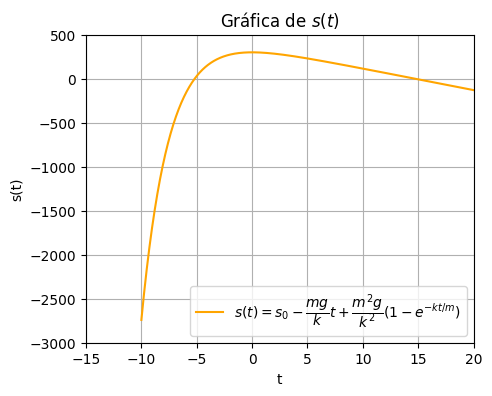

In [46]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
s0 = 300
m = 0.25
k = 0.1
def funcion1(x:float)->float:
    return s0 - (m*g/k)*x + (m**2*g/k**2)*(1-np.e**(-k*x/m))

x = np.linspace(-10, 20, 1000)
y1 = funcion1(x)
# y2 = funcion2(x)
plt.figure(figsize=(5, 4))
plt.plot(x, y1, color = 'orange',label='$s(t) = s_0 - \dfrac{mg}{k}t + \dfrac{m^2g}{k^2}(1-e^{-kt/m})$')
ax = plt.gca()
ax.set_ylim([-3000, 500])
ax.set_xlim([-15, 20])

plt.title('Gráfica de $s(t)$')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.legend()
plt.show()

## Encontrar la raíz (tiempo)

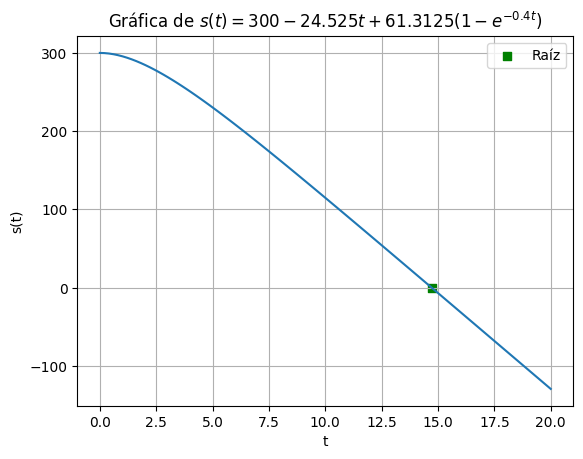

El valor de la raíz es: 14.7


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Primero, hay que despejar la ecuación, dejándola de la forma y = f(h)
g = 9.81
s0 = 300
m = 0.25
k = 0.1

def equation(x):
    return s0 - (m*g/k)*x + (m**2*g/k**2)*(1-np.e**(-k*x/m))

def bisection(a, b, equation, tol=1e-2, N=50):
    """
    Método de la Bisección: encuentra la raiz de una ecuación dentro de un intervalo [a,b].
    """
    if equation(a) * equation(b) >= 0:
        raise ValueError("No hay raíz en el intervalo dado.")

    a_n = a
    b_n = b

    for n in range(1, N+1):
        m_n = (a_n + b_n)/2
        f_m_n = equation(m_n)

        if abs(f_m_n) < tol:
            return m_n

        if equation(a_n) * f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif equation(b_n) * f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            raise ValueError("El método de la bisección falló.")

    return (a_n + b_n)/2

def FL_rounding(num:float, digits:int)->float:
  ''' Rounds the given ``num`` with the given significant ``digits``.
  Used for arithmetic computation.
  '''
  num = float(f"{num:.{digits - 1}e}")
  return num

def plotting(a, b, i):
    x = np.linspace(a, b, 100)
    y = equation(x)
    root = bisection(a, b, equation=equation, tol=1e-2, N=1000)

    plt.plot(x, y)
    plt.xlabel('t')
    plt.ylabel('s(t)')
    plt.title('Gráfica de $s(t) = 300 - 24.525t + 61.3125(1-e^{-0.4t})$')
    plt.scatter(root, 0, color='green', marker='s', label='Raíz')
    plt.grid(True)
    plt.legend()
    plt.show()
    root = FL_rounding(root,3)
    print("El valor de la raíz es:", root)

# Llamar a la función plotting directamente
plotting(0, 20, 11)